# tutorial 2

today we analyze an excel file

In [2]:
import pandas as pd


## open excel with pandas and put in dataframe

In [61]:
df = pd.read_excel('/Users/fabien/desktop/Data-sheet-STUDENTS.xlsx',
             header=2,
            usecols=[1],
              names=['countries']
             )

In [17]:
countries= {}
for country in df['countries']:
    countries[country] = {}
countries

{'Afghanistan': {},
 'Albania': {},
 'Armenia': {},
 'Azerbaijan': {},
 'Bahrain': {},
 'Bangladesh': {},
 'Belarus': {},
 'Bhutan': {},
 'Bosnia and Herzegovina': {},
 'Brunei': {},
 'Bulgaria': {},
 'Cambodia': {},
 'China': {},
 'Croatia': {},
 'Czech Republic': {},
 'East Timor': {},
 'Egypt': {},
 'Estonia': {},
 'France (Not BRI)': {},
 'Georgia': {},
 'Germany (not BRI)': {},
 'Hungary': {},
 'India': {},
 'Indonesia': {},
 'Iran': {},
 'Iraq': {},
 'Israel': {},
 'Jordan': {},
 'Kazakhstan': {},
 'Kuwait': {},
 'Kyrgyzstan': {},
 'Laos': {},
 'Latvia': {},
 'Lebanon': {},
 'Lithuania': {},
 'Macedonia': {},
 'Malaysia': {},
 'Maldives': {},
 'Moldova': {},
 'Mongolia': {},
 'Montenegro': {},
 'Myanmar': {},
 'Nepal': {},
 'Oman': {},
 'Pakistan': {},
 'Philippines': {},
 'Poland': {},
 'Qatar': {},
 'Romania': {},
 'Russia': {},
 'Saudi Arabia': {},
 'Serbia': {},
 'Singapore': {},
 'Slovakia': {},
 'Slovenia': {},
 'Sri Lanka': {},
 'Syria': {},
 'Tajikistan': {},
 'Thailiand'

In [26]:
import requests
#from tqdm import tnrange, tqdm_notebook
#from time import sleep

#for i in tnrange(len(countries.keys())):
for country in countries.keys():
    try:
#        country = list(countries.keys())[i]
        url = 'https://restcountries.eu/rest/v2/name/'+country
        r = requests.get(url)
        data = r.json()
        countries[country]['alpha2code']=data[0]['alpha2Code']
    except KeyError:
        print(data)
        sleep(5)

{'status': 404, 'message': 'Not Found'}
{'status': 404, 'message': 'Not Found'}
{'status': 404, 'message': 'Not Found'}
{'status': 404, 'message': 'Not Found'}
{'status': 404, 'message': 'Not Found'}
{'status': 404, 'message': 'Not Found'}


In [35]:
for k,v in countries.items():
    country = ''
    if len(v.keys()) == 0:
        if 'not bri' in k.lower():
            country = k.split('(')[0].strip()
        elif k == 'Thailiand':
            country ='thailand'
        else:
            country = k[4:]
        try:
            url = 'https://restcountries.eu/rest/v2/name/'+country
            r = requests.get(url)
            data = r.json()
            countries[k]['alpha2code']=data[0]['alpha2Code']
        except KeyError:
            print(data)
            sleep(5)

In [44]:
for k,v in countries.items():
    try : 
        url = 'http://api.worldbank.org/v2/countries/'+v['alpha2code']+'/indicators/NY.GDP.MKTP.CD?format=json'
        r = requests.get(url)
        data = r.json()
        countries[k]['gdp'] = float(data[1][0]['value'])
        sleep(2)
    except IndexError:
        print(k,'has an index problem', data)
    except TypeError:
        print(k,'has an type problem', data)

India has an index problem [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]
Syria has an type problem [{'page': 1, 'pages': 2, 'per_page': 50, 'lastupdated': '2018-10-18', 'total': 58}, [{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'SY', 'value': 'Syrian Arab Republic'}, 'countryiso3code': 'SYR', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'SY', 'value': 'Syrian Arab Republic'}, 'countryiso3code': 'SYR', 'date': '2016', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'SY', 'value': 'Syrian Arab Republic'}, 'countryiso3code': 'SYR', 'date': '2015', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current U

In [45]:
countries

{'Afghanistan': {'alpha2code': 'AF', 'gdp': 20815300220.0428},
 'Albania': {'alpha2code': 'AL', 'gdp': 13039352743.9616},
 'Armenia': {'alpha2code': 'AM', 'gdp': 11536590635.8268},
 'Azerbaijan': {'alpha2code': 'AZ', 'gdp': 40747792237.9735},
 'Bahrain': {'alpha2code': 'BH', 'gdp': 35307127659.5745},
 'Bangladesh': {'alpha2code': 'BD', 'gdp': 249723887765.42},
 'Belarus': {'alpha2code': 'BY', 'gdp': 54442374372.5094},
 'Bhutan': {'alpha2code': 'BT', 'gdp': 2511852941.17647},
 'Bosnia and Herzegovina': {'alpha2code': 'BA', 'gdp': 18168579578.1952},
 'Brunei': {'alpha2code': 'BN', 'gdp': 12128089001.5858},
 'Bulgaria': {'alpha2code': 'BG', 'gdp': 56831518294.4397},
 'Cambodia': {'alpha2code': 'KH', 'gdp': 22158209502.6391},
 'China': {'alpha2code': 'CN', 'gdp': 12237700479375.0},
 'Croatia': {'alpha2code': 'HR', 'gdp': 54849180228.8716},
 'Czech Republic': {'alpha2code': 'CZ', 'gdp': 215725534372.371},
 'East Timor': {'alpha2code': 'TL', 'gdp': 2954620999.58441},
 'Egypt': {'alpha2code':

In [49]:
countries['India']['alpha2code']='IN'
url = 'http://api.worldbank.org/v2/countries/IN/indicators/NY.GDP.MKTP.CD?format=json'
r = requests.get(url)
data = r.json()
countries['India']['gdp'] = float(data[1][0]['value'])

In [59]:
countries['Yemen']['gdp'] = None
countries['Syria']['gdp'] = None

In [63]:
s = pd.Series([v['gdp'] for k,v in countries.items()])

In [66]:
df['gdp'] = s

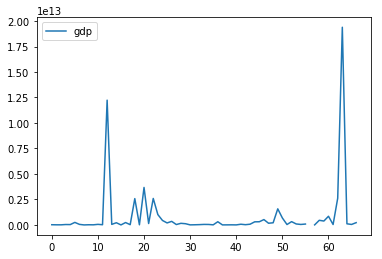

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot()

In [71]:
writer = pd.ExcelWriter('output.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()
